In [82]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [79]:
class GreedyAgglomerative:
    def __init__(self, distance_function = 'euclidian', linkage = 'single'):
        # attributes
        self._merges = []

        # internally used variables
        self._X = None
        self._clusters = None
        self._n = None
        self._distance_matrix = None
        self._distance_function = distance_function
        self._linkage = linkage

    def __greedy(self):
        """
        Greedy Algorithm to find the Hierarchical Clustering
        """
        while len(self._clusters) > 1:

            # Find index of minimum from the distance matrix
            min_ind = (np.where(self._distance_matrix == np.amin(self._distance_matrix)))
            min_ind = [min_ind[0][0], min_ind[1][0]]

            # minimum distance
            min_dist = self._distance_matrix.min()

            # Merge two clusters using single/complete linkage
            if self._linkage == 'single':
                for k in range(len(self._distance_matrix)):
                    if k not in min_ind:
                        self._distance_matrix[min_ind[0]][k] = min(self._distance_matrix[min_ind[0]][k], self._distance_matrix[min_ind[1]][k])
                        self._distance_matrix[k][min_ind[0]] = self._distance_matrix[min_ind[0]][k]

            if self._linkage == 'complete':
                for k in range(len(self._distance_matrix)):
                    if k not in min_ind:
                        self._distance_matrix[min_ind[0]][k] = max(self._distance_matrix[min_ind[0]][k], self._distance_matrix[min_ind[1]][k])
                        self._distance_matrix[k][min_ind[0]] = self._distance_matrix[min_ind[0]][k]


            self._distance_matrix = np.delete(self._distance_matrix, min_ind[1], 0)
            self._distance_matrix = np.delete(self._distance_matrix, min_ind[1], 1)
            # Update clusters
            self._clusters[min_ind[0]] = self._clusters[min_ind[0]] + self._clusters[min_ind[1]]

            # Record merge (the last component of merge is a placeholder 0 for it to work with dendrogram plotting)
            self._merges.append([self._clusters[min_ind[0]][0],self._clusters[min_ind[0]][1], min_dist, 0])

            # Rename new cluster to the next available number
            self._clusters[min_ind[0]] = [self._n]

            # Increase cluster number
            self._n += 1

            # Remove old cluster member
            self._clusters.pop(min_ind[1])

    def __compute_distance_matrix(self):
        """
        computes distance matrix based on distance_function and assigns it to self._distance_matrix
        :return:
        """
        self._distance_matrix = np.zeros((self._n, self._n))
        self._distance_matrix[:, :] = 'inf'

        if self._distance_function == 'manhattan':
            for i in range(self._n-1):
                for j in range(i+1,self._n):
                    self._distance_matrix[i][j] = distance.cityblock(self._X[i], self._X[j])
                    self._distance_matrix[j][i] = self._distance_matrix[i][j]

        if self._distance_function == 'euclidian':
            for i in range(self._n-1):
                for j in range(i+1,self._n):
                    self._distance_matrix[i][j] = distance.euclidean(self._X[i], self._X[j])
                    self._distance_matrix[j][i] = self._distance_matrix[i][j]

    def fit(self, x):
        """
        Fits the model according to x
        :param x: dataset
        """
        self._X = x
        self._n = len(self._X)
        self._clusters = [[i] for i in range(self._n)]
        self.__compute_distance_matrix()

    def predict(self):
            """
            Predicts labels of X according to the model and writes them to labels_, where they can be accessed
            """
            self.__greedy()
            return self._merges

    def fit_predict(self, x):
        self.fit(x)
        self.predict()
        return self._merges

In [85]:
# dataset
X = np.array([[0,0], [10,10], [21,21], [33,33], [5, 27], [28,6]])

[[0, 1, 20.0, 0], [2, 4, 22.0, 0], [3, 5, 32.0, 0], [6, 7, 42.0, 0], [9, 8, 66.0, 0]]


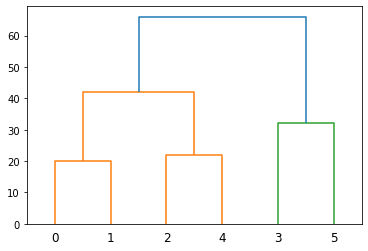

In [86]:
# Hierarchical clustering (manhattan, complete linkage)
clustering = GreedyAgglomerative('manhattan', 'complete')
merges = clustering.fit_predict(X)
print(merges)

dn = dendrogram(merges)
plt.show()

[[0, 1, 20.0, 0], [6, 2, 22.0, 0], [7, 4, 22.0, 0], [8, 5, 22.0, 0], [9, 3, 24.0, 0]]


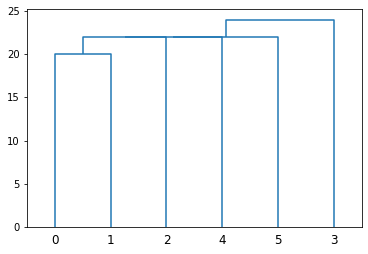

In [87]:
# Hierarchical clustering (manhattan, single linkage)
clustering = GreedyAgglomerative('manhattan')
merges = clustering.fit_predict(X)
print(merges)

dn = dendrogram(merges)
plt.show()

[[0, 1, 14.142135623730951, 0], [6, 2, 15.556349186104045, 0], [7, 5, 16.55294535724685, 0], [8, 3, 16.97056274847714, 0], [9, 4, 17.08800749063506, 0]]


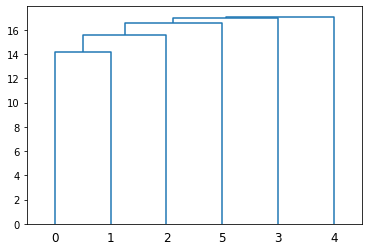

In [88]:
# Hierarchical clustering (euclidian, single linkage)
clustering = GreedyAgglomerative()
merges = clustering.fit_predict(X)
print(merges)

dn = dendrogram(merges)
plt.show()